In [2]:
import requests
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry.polygon import orient


## Querying State and CD Boundaries data from TIGERweb

In [ ]:
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb"
sc_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='45'&outFields=NAME,COUNTY&f=geojson"
md_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='24'&outFields=NAME,COUNTY&f=geojson"


sc_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='24'&outFields=NAME&f=geojson"


sc_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

In [21]:
response = requests.get(sc_CD_url)
output_file  = "south_carolina_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC SLDL:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC SLDL:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
GeoJSON data with county boundaries successfully saved to south_carolina_cd.geojson


In [18]:
response = requests.get(md_CD_url)
output_file  = "maryland_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD CD:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD CD:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
- Congressional District 8
GeoJSON data with county boundaries successfully saved to maryland_cd.geojson


In [2]:
response = requests.get(md_state_url)
output_file  = "maryland_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD State:
- Maryland
GeoJSON data with county boundaries successfully saved to maryland_state.geojson


In [3]:
response = requests.get(sc_state_url)
output_file  = "south_carolina_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC State:
- South Carolina
GeoJSON data with county boundaries successfully saved to south_carolina_state.geojson


## Querying Precincts Boundaries data from downloaded files

In [60]:
sc_precincts_gdf = gpd.read_file('raw/precincts/sc_2022_gen_prec/sc_2022_gen_cong_prec/sc_2022_gen_cong_prec.shp')

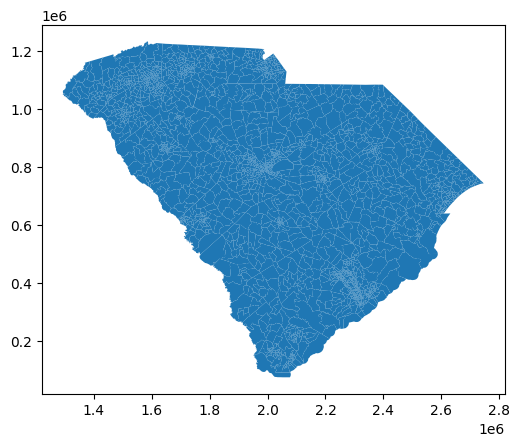

In [61]:
sc_precincts_gdf.plot()
plt.show()

In [62]:
print(sc_precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'Precinct' 'Prec_Code' 'CONG_DIST'
 'GCON01AODD' 'GCON01DAND' 'GCON01OWRI' 'GCON01RMAC' 'GCON02DLAR'
 'GCON02OWRI' 'GCON02RWIL' 'GCON03OWRI' 'GCON03RDUN' 'GCON04OWRI'
 'GCON04RTIM' 'GCON05DHUN' 'GCON05GGAI' 'GCON05OWRI' 'GCON05RNOR'
 'GCON06DCLY' 'GCON06OWRI' 'GCON06RBUC' 'GCON07DSCO' 'GCON07OWRI'
 'GCON07RFRY' 'geometry']


In [63]:
def orient_geometry(geom):
    if geom.type == 'Polygon':
        return orient(geom, sign=1.0)
    elif geom.type == 'MultiPolygon':
        return MultiPolygon([orient(part, sign=1.0) for part in geom.geoms])
    else:
        return geom

In [64]:
sc_precincts_gdf['geometry'] = sc_precincts_gdf['geometry'].apply(orient_geometry)
sc_precincts_gdf = sc_precincts_gdf.to_crs(epsg=4326)

/var/folders/3l/c_gyf2kn1vg4ww5h_h4819cm0000gn/T/ipykernel_8535/2600728937.py:2: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == 'Polygon':
/var/folders/3l/c_gyf2kn1vg4ww5h_h4819cm0000gn/T/ipykernel_8535/2600728937.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geom.type == 'MultiPolygon':


In [65]:
sc_precincts_gdf.rename(columns={'Precinct': 'NAME'}, inplace=True)


In [66]:
print(sc_precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'NAME' 'Prec_Code' 'CONG_DIST'
 'GCON01AODD' 'GCON01DAND' 'GCON01OWRI' 'GCON01RMAC' 'GCON02DLAR'
 'GCON02OWRI' 'GCON02RWIL' 'GCON03OWRI' 'GCON03RDUN' 'GCON04OWRI'
 'GCON04RTIM' 'GCON05DHUN' 'GCON05GGAI' 'GCON05OWRI' 'GCON05RNOR'
 'GCON06DCLY' 'GCON06OWRI' 'GCON06RBUC' 'GCON07DSCO' 'GCON07OWRI'
 'GCON07RFRY' 'geometry']


In [67]:
sc_precincts_gdf['UNIQUE_ID'] = (
    sc_precincts_gdf['County'] + ' PRECINCT ' + sc_precincts_gdf['Prec_Code'].astype(str)
)

In [68]:
sc_precincts_gdf = sc_precincts_gdf[['UNIQUE_ID', 'NAME', 'Prec_Code', 'CONG_DIST', 'geometry']]

In [69]:

sc_precincts_gdf.to_file(
    "states/south_carolina/geodata/south_carolina_precincts.geojson",
    driver="GeoJSON",
    drop_crs=True
)

In [73]:
md_precincts_gdf = gpd.read_file('md_2020/md_2020.shp')

In [55]:
print(md_precincts_gdf.head())

                     NAME  NUMBER JURSCODE VOTESPRE  G20PREDBID  G20PRERTRU  \
0  HOWARD PRECINCT 06-001  06-001     HOWA  006-001        1005         402   
1  HOWARD PRECINCT 05-023  05-023     HOWA  005-023        1116         190   
2  HOWARD PRECINCT 05-018  05-018     HOWA  005-018         896         159   
3  HOWARD PRECINCT 05-017  05-017     HOWA  005-017        1085         290   
4  HOWARD PRECINCT 05-020  05-020     HOWA  005-020        1188         663   

   G20PRELJOR  G20PREGHAW  G20PREBSEG  G20PREOWRI  \
0          30           6           5          11   
1          14           4           2           9   
2           8           2           1           9   
3          14           6           3          13   
4          22           6           1          21   

                                            geometry  
0  POLYGON Z ((1360475.813 539373.556 0.000, 1360...  
1  POLYGON Z ((1343191.760 567973.996 0.000, 1343...  
2  POLYGON Z ((1344525.177 561849.349 0.0

In [74]:
print(md_precincts_gdf.columns.values)

['NAME' 'NUMBER' 'JURSCODE' 'VOTESPRE' 'G20PREDBID' 'G20PRERTRU'
 'G20PRELJOR' 'G20PREGHAW' 'G20PREBSEG' 'G20PREOWRI' 'geometry']


In [75]:
md_precincts_gdf = md_precincts_gdf[['NAME','NUMBER', 'geometry']]

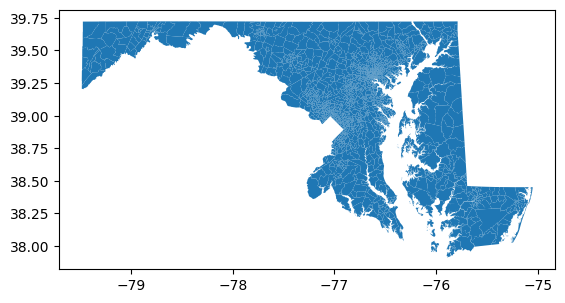

In [71]:
md_precincts_gdf.plot()
plt.show()

In [76]:
md_precincts_gdf['geometry'] = md_precincts_gdf['geometry'].apply(orient_geometry)
md_precincts_gdf = md_precincts_gdf.to_crs(epsg=4326)


/var/folders/3l/c_gyf2kn1vg4ww5h_h4819cm0000gn/T/ipykernel_8535/2600728937.py:2: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom.type == 'Polygon':
/var/folders/3l/c_gyf2kn1vg4ww5h_h4819cm0000gn/T/ipykernel_8535/2600728937.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geom.type == 'MultiPolygon':


In [30]:
print(md_precincts_gdf.head())

                     NAME  NUMBER JURSCODE VOTESPRE  G20PREDBID  G20PRERTRU  \
0  HOWARD PRECINCT 06-001  06-001     HOWA  006-001        1005         402   
1  HOWARD PRECINCT 05-023  05-023     HOWA  005-023        1116         190   
2  HOWARD PRECINCT 05-018  05-018     HOWA  005-018         896         159   
3  HOWARD PRECINCT 05-017  05-017     HOWA  005-017        1085         290   
4  HOWARD PRECINCT 05-020  05-020     HOWA  005-020        1188         663   

   G20PRELJOR  G20PREGHAW  G20PREBSEG  G20PREOWRI  \
0          30           6           5          11   
1          14           4           2           9   
2           8           2           1           9   
3          14           6           3          13   
4          22           6           1          21   

                                            geometry  
0  POLYGON Z ((-76.83025 39.14757 0.00000, -76.83...  
1  POLYGON Z ((-76.89107 39.22616 0.00000, -76.89...  
2  POLYGON Z ((-76.88639 39.20934 0.00000

In [77]:
md_precincts_gdf.rename(columns={'NAME': 'UNIQUE_ID'}, inplace=True)

In [78]:
md_precincts_gdf.rename(columns={'NUMBER': 'NAME'}, inplace=True)

In [79]:
md_precincts_gdf.to_file(
    "states/maryland/geodata/maryland_precincts.geojson",
    driver="GeoJSON",
    drop_crs=True
)